<a href="https://colab.research.google.com/github/minnjeee/SWcamp/blob/main/12_%EB%94%A5%EB%9F%AC%EB%8B%9D/ex03)_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0_iris%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목표
- 머신러닝에서 사용해봤던 iris 품종 예측 다중분류 문제를 신경망으로 풀어보자!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# iris 데이터셋 임포트
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()

In [ ]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

- 문제, 정답 분리

In [ ]:
X = data['data']
y = data['target']

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 정답 데이터 인코딩
- 신경망 출력층에서 각 클래스 값들에 대한 확률(0 ~ 1)값과 비교하여 정확한 오차를 구하기 위해서 정답의 범위도 0 ~ 1사이 값으로 변환시켜줘야함

In [ ]:
y_one_hot = pd.get_dummies(y)
y_one_hot

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


- 학습, 평가 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot,
                                                    test_size=0.2, random_state=55)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

## 신경망 모델링
1. 신경망 구조 설계
2. 학습 및 평가방법 설정
3. 학습 + 시각화
4. 모델 평가

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# 1. 신경망 구조 설계
model = Sequential()
model.add(Dense(50, input_dim=4, activation='sigmoid'))

model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.add(Dense(3, activation='softmax'))
# 3으로 설정한 이유 : 각 레이블의 예측 확률값 개수

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                250       
                                                                 
 dense_11 (Dense)            (None, 100)               5100      
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 10)                510       
                                                                 
 dense_14 (Dense)            (None, 3)                 33        
                                                                 
Total params: 10,943
Trainable params: 10,943
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [ ]:
h = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 4ms/step - loss: 1.3590 - acc: 0.3250
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 1.2934 - acc: 0.3250
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 1.2407 - acc: 0.3250
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 1.2031 - acc: 0.3250
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1709 - acc: 0.3250
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1438 - acc: 0.3250
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1282 - acc: 0.3250
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 1.1128 - acc: 0.3250
Epoch 9/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1046 - acc: 0.3250
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0969 - acc: 0.3250
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 1.0929 

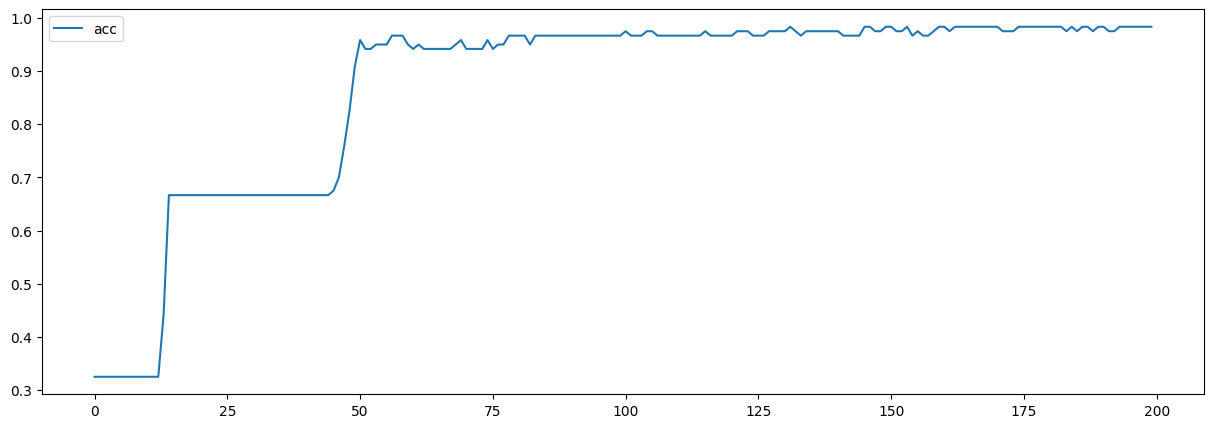

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'], label='acc')

plt.legend()
plt.show()

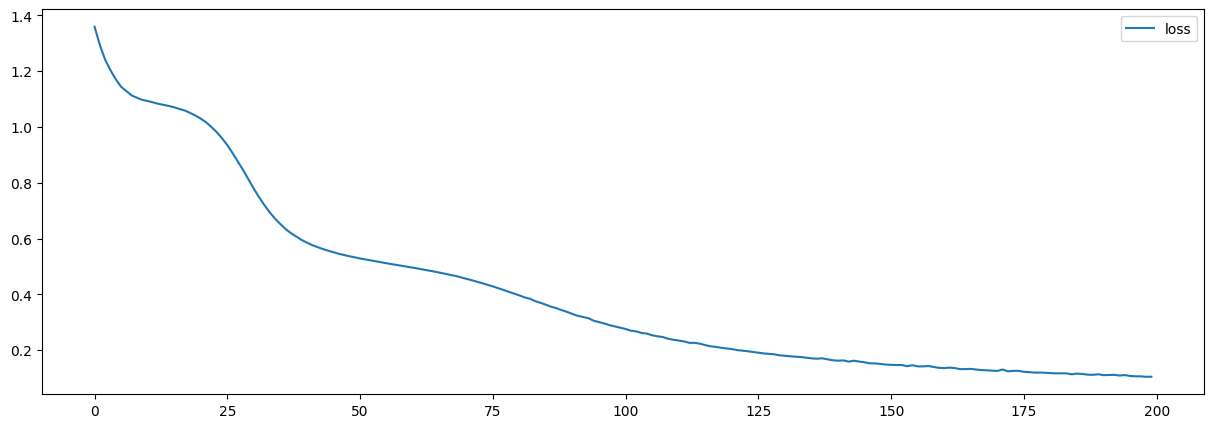

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(h.history['loss'], label='loss')

plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 166ms/step - loss: 0.0856 - acc: 1.0000


[0.08563485741615295, 1.0]